In [4]:
import sys, os
import torch
import numpy as np
from sklearn.metrics import mean_squared_error
sys.path.append("../")
from cUNet_pytorch_pooling import cUNet
from utilities import define_dataset, inference_phase_rUNet, inference_phase_rUNet_plot_notebook, training_phase_rUNet

In [15]:
%matplotlib inline

In [5]:
DATA_DIR_DEEPTHOUGHT="/storage/yw18581/data"
DATA_DIR_IH = "/data/uob/"

In [6]:
data_dir = DATA_DIR_DEEPTHOUGHT

In [7]:
model = cUNet(out_size=1)

In [8]:
model_path = "../model/trained_cUNet_pytorch_regression_2_4_10_20_25_35_dataset_100epochs_coeff_mask0.75_validation.pkl"

In [9]:
model.load_state_dict(torch.load(model_path));

In [10]:
root_folder = os.path.join(data_dir, "dataset")

In [11]:
excluded = ['10x10_2mm_first_clean', '10x10_4mm_first_clean', '10x10_10mm_first_clean', '10x10_20mm_first_clean',
            '10x10_25mm_first_clean', '10x10_35mm_first_clean',
            '10x10_2mm_second_clean', '10x10_4mm_second_clean', '10x10_10mm_second_clean', '10x10_20mm_second_clean',
            '10x10_25mm_second_clean', '10x10_35mm_second_clean',
            '10x10_2mm_third_clean', '10x10_4mm_third_clean', '10x10_10mm_third_clean', '10x10_20mm_third_clean', 
           '10x10_25mm_third_clean', '10x10_35mm_third_clean']

In [12]:
data_loaders, data_lengths = define_dataset(root_folder, batch_size=16, excluded_list=excluded)

In [13]:
data_lengths

{'train': 2261, 'val': 565, 'test': 706}

batch 1
1: true_dist: 30, pred_dist: [30.91709]


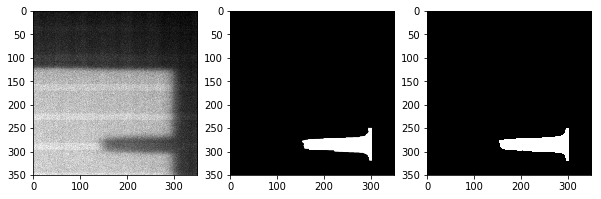

2: true_dist: 3, pred_dist: [3.299374]


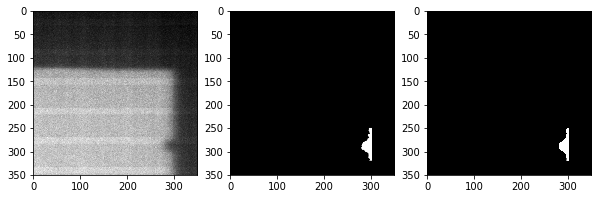

3: true_dist: 3, pred_dist: [3.2318263]


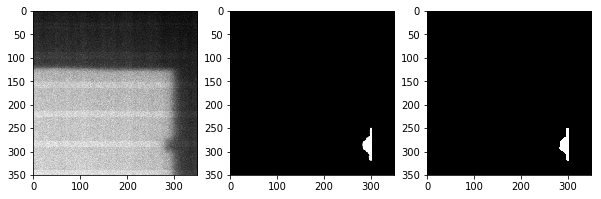

4: true_dist: 15, pred_dist: [14.714276]


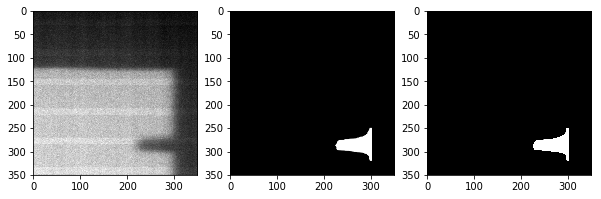

5: true_dist: 3, pred_dist: [3.2953997]


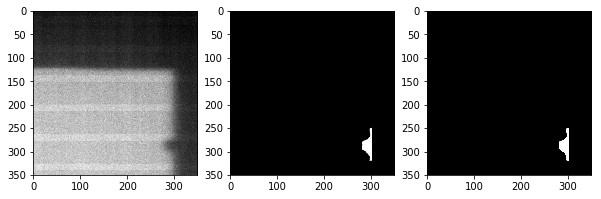

6: true_dist: 3, pred_dist: [3.2746425]


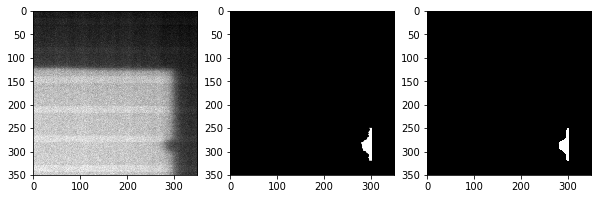

7: true_dist: 15, pred_dist: [14.773277]


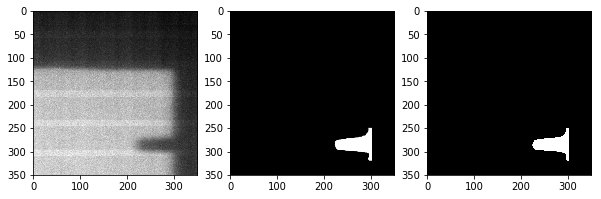

8: true_dist: 1, pred_dist: [1.7921597]


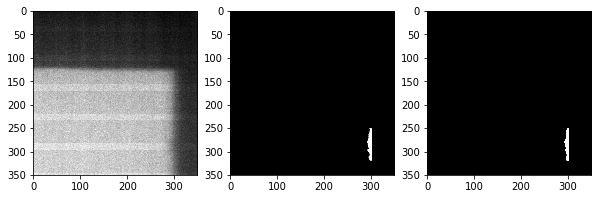

9: true_dist: 3, pred_dist: [3.2861555]


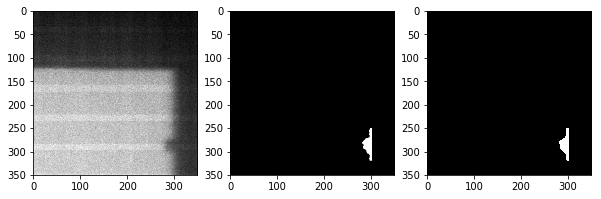

10: true_dist: 1, pred_dist: [1.7947533]


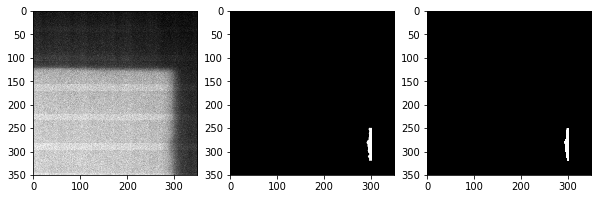

11: true_dist: 3, pred_dist: [3.271629]


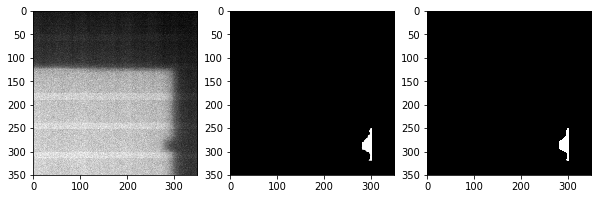

12: true_dist: 1, pred_dist: [1.8199613]


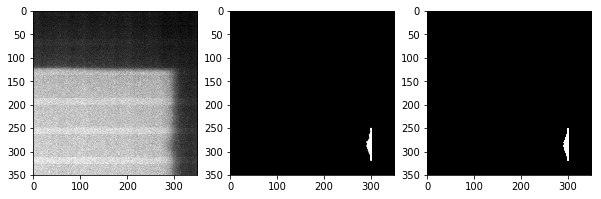

13: true_dist: 1, pred_dist: [1.7627225]


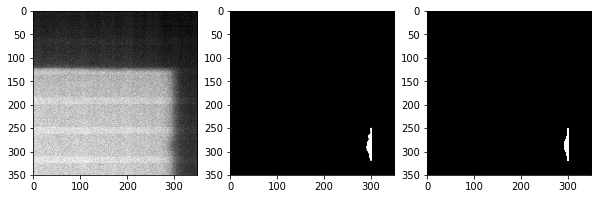

14: true_dist: 1, pred_dist: [1.7387315]


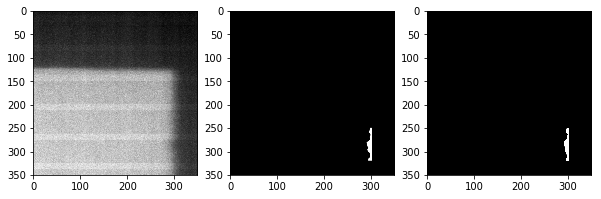

15: true_dist: 1, pred_dist: [1.8059794]


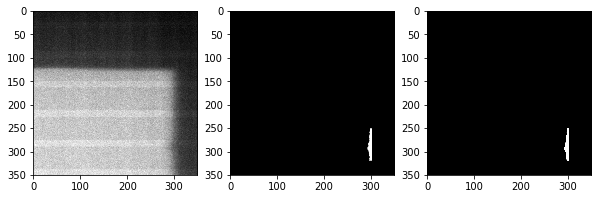

16: true_dist: 15, pred_dist: [14.75601]


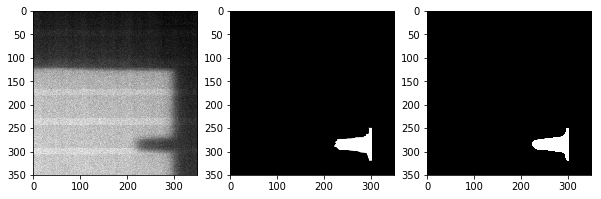

In [16]:
inference_phase_rUNet_plot_notebook(model, data_loaders, data_lengths, batch_size=16, stop=2)

In [18]:
torch.cuda.empty_cache()

In [19]:
y_true, y_pred = inference_phase_rUNet(model, data_loaders, data_lengths, batch_size=16,
                                      notebook=True)

In [20]:
print("mse: {}".format(mean_squared_error(y_true, y_pred)))

mse: 0.43910672812571855


In [21]:
def get_idx(arr, key):
    return np.where(arr==key)[0]

In [22]:
def idx_mse(dist, true_arr = y_true, preds_arr = y_pred):
    idx = np.where(true_arr==dist)[0]
    mse = mean_squared_error(true_arr[idx], preds_arr[idx])
    print(dist, mse)
    return idx, mse 

In [23]:
idx_1, mse_1 = idx_mse(1)
#idx_2, mse_2 = idx_mse(2)
idx_3, mse_3 = idx_mse(3)
#idx_4, mse_4 = idx_mse(4)
#idx_10, mse_10 = idx_mse(10)
idx_15, mse_15 = idx_mse(15)
#idx_20, mse_20 = idx_mse(20)
#idx_25, mse_25 = idx_mse(25)
idx_30, mse_30 = idx_mse(30)
#idx_35, mse_35 = idx_mse(35)

1 0.6192140356859474
3 0.0945498660362753
15 0.06976108105108728
30 0.8973925953284773


In [24]:
distances = [1,3,15,30]

In [25]:
errors = [idx_mse(i)[1] for i in distances]

1 0.6192140356859474
3 0.0945498660362753
15 0.06976108105108728
30 0.8973925953284773


In [27]:
import matplotlib.pyplot as plt

(0, 1)

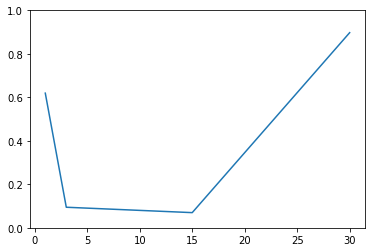

In [28]:
plt.plot(distances, errors)
plt.ylim((0,1))

In [29]:
np.savez_compressed("Predicted_train_6positions_100epochs.npz",
                   true = y_true, pred = y_pred)

#### Inference on test dataset (20% held off from training)

import sys, os
import torch
import torch.nn as nn
import numpy as np
from torchvision import transforms
from tqdm.notebook import tqdm, trange
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
sys.path.append("../")
from Transformers import ChannelsFirst, ToTensor, Cut, Rescale, splitter_train_val_test
from DataSets import UNetDatasetFromFolders
from cUNet_pytorch_pooling import cUNet, dice_loss


In [30]:
DATA_DIR_DEEPTHOUGHT = os.path.join("/",'storage','yw18581','data')
data_dir = DATA_DIR_DEEPTHOUGHT


root_folder = os.path.join(data_dir, "dataset")


excluded = ['10x10_1mm_first_clean', '10x10_3mm_first_clean', '10x10_15mm_first_clean', '10x10_30mm_first_clean',
            '10x10_1mm_second_clean', '10x10_3mm_second_clean', '10x10_15mm_second_clean', '10x10_30mm_second_clean',
            '10x10_1mm_third_clean', '10x10_3mm_third_clean', '10x10_15mm_third_clean', '10x10_30mm_third_clean']

In [31]:
data_loaders, data_lengths = define_dataset(root_folder, batch_size=16, excluded_list=excluded)

data_lengths

{'train': 3456, 'val': 864, 'test': 1080}

In [32]:
y_true, y_pred = inference_phase_rUNet(model, data_loaders, data_lengths, batch_size=16,
                                      notebook=True)

In [33]:
print("mse: {}".format(mean_squared_error(y_true, y_pred)))



mse: 0.001067176929942843


In [34]:
np.savez_compressed("Predicted_testdata_6positions_100epochs.npz",
                   true = y_true, pred = y_pred)